<a href="https://colab.research.google.com/github/ganjiron/ganpython/blob/master/TrendReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 나눔 폰트 설치
!apt-get -qq -y install fonts-nanum

# 캐시 삭제
!fc-cache -fv

# 폰트 설치 확인
!fc-list | grep Nanum

# 런타임 다시 시작
# 이 셀을 실행한 후 런타임을 다시 시작해야 폰트가 적용됩니다.

Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory det

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# 런타임 중 폰트 설정
fm._rebuild()
plt.rc('font', family='NanumGothic')

# 한글 테스트
plt.figure(figsize=(6, 4))
plt.text(0.5, 0.5, '한글 테스트', size=20, ha='center')
plt.show()

AttributeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 간단한 주식 가격 데이터 생성 (임의의 데이터)
np.random.seed(42)
price_changes = np.random.normal(0.001, 0.02, 100)  # 가격 변동
prices = 100 + np.cumsum(price_changes)  # 누적 합으로 가격 생성
date_rng = pd.date_range(start='2023-01-01', end='2023-04-10', freq='B')  # 영업일 기준 날짜 생성
price_df = pd.DataFrame(data={'date': date_rng, 'price': prices[:71]})


In [ ]:
len(date_rng)

71

In [ ]:
len(prices)

100

In [ ]:
prices[:71]

array([100.01093428, 100.009169  , 100.02312277, 100.05458336,
       100.0509003 , 100.04721756, 100.07980181, 100.09615051,
       100.08776102, 100.09961222, 100.09134387, 100.08302927,
       100.08886852, 100.05160291, 100.01810456, 100.00785881,
        99.98860218,  99.99588713,  99.97872665,  99.95148058,
        99.98179355,  99.97827802,  99.98062859,  99.95313363,
        99.94324597,  99.94646442,  99.92444455,  99.93295851,
        99.92194574,  99.91711186,  99.90607773,  99.94412329,
        99.94485335,  99.92469913,  99.94215003,  99.91873316,
        99.92391043,  99.88571703,  99.8601533 ,  99.86509053,
        99.88085986,  99.88528723,  99.88397426,  99.87895219,
        99.85038175,  99.83698486,  99.82877209,  99.85091453,
        99.8587869 ,  99.82452609,  99.83200777,  99.82530613,
        99.81276769,  99.82600121,  99.8476212 ,  99.86724681,
        99.85146246,  99.84627821,  99.85390348,  99.87441438,
        99.8658309 ,  99.86311772,  99.84199102,  99.81

최종 현금: $8900.99, 최종 주식 수: 11


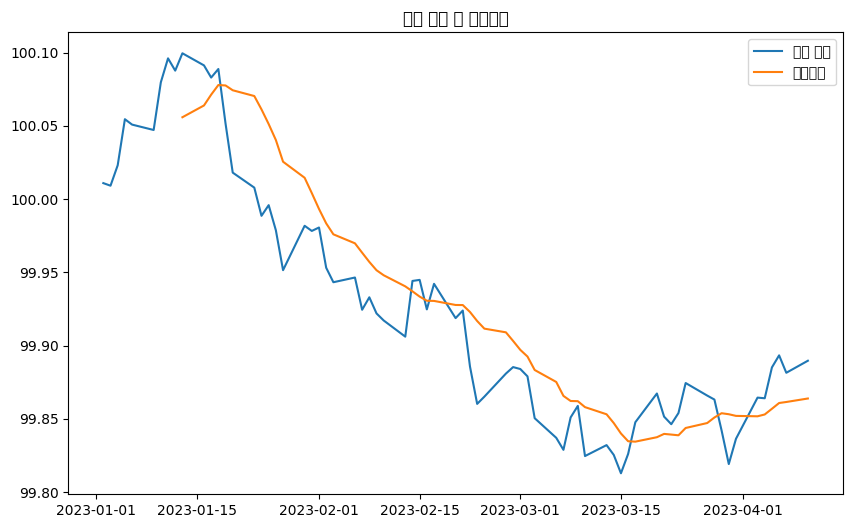

In [ ]:

# 기본적인 강화 학습 에이전트 클래스
class SimpleAgent:
    def __init__(self, initial_cash=10000):
        self.cash = initial_cash
        self.stock = 0

    def act(self, state):
        # 간단한 전략: 현재 가격이 이동평균보다 크면 주식을 사고, 그렇지 않으면 판매
        if state['price'] > state['moving_average']:
            return 'buy'
        else:
            return 'sell'

    def update_portfolio(self, action, state):
        price = state['price']
        if action == 'buy' and self.cash >= price:
            self.stock += 1
            self.cash -= price
        elif action == 'sell' and self.stock > 0:
            self.stock -= 1
            self.cash += price

# 이동평균 계산
price_df['moving_average'] = price_df['price'].rolling(window=10).mean()

# 에이전트 초기화
agent = SimpleAgent()

# 학습 루프
for index, row in price_df.iterrows():
    state = {'price': row['price'], 'moving_average': row['moving_average']}
    action = agent.act(state)
    agent.update_portfolio(action, state)

# 최종 포트폴리오 출력
print(f"최종 현금: ${agent.cash:.2f}, 최종 주식 수: {agent.stock}")

# 포트폴리오 변화 시각화
plt.figure(figsize=(10, 6))
plt.plot(price_df['date'], price_df['price'], label='주식 가격')
plt.plot(price_df['date'], price_df['moving_average'], label='이동평균')
plt.legend()
plt.title('주식 가격 및 이동평균')
plt.show()


In [ ]:
import numpy as np

# 강화 학습 환경 클래스
class FacilityEnvironment:
    def __init__(self, trend_true, trend_pred):
        self.trend_true = trend_true
        self.trend_pred = trend_pred
        self.current_step = 0
        self.max_steps = len(trend_true)
        self.state = self.observe()

    def observe(self):
        # 현재 상태 관측
        return np.array([self.trend_true[self.current_step], self.trend_pred[self.current_step]])

    def take_action(self, action):
        # 행동 취하기
        # 여기에서는 단순히 다음 타임스텝으로 넘어가는 것으로 가정
        self.current_step += 1
        if self.current_step >= self.max_steps:
            self.current_step = 0  # 에피소드 루프

        # 새로운 상태 관측
        self.state = self.observe()

    def get_reward(self):
        # 보상 함수
        # 여기에서는 실제 트렌드와 예측 트렌드의 차이로 정의
        return -np.abs(self.trend_true[self.current_step] - self.trend_pred[self.current_step])

# Q-learning 에이전트 클래스
class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, exploration_rate=1.0):
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.q_table = {}

    def get_action(self, state):
        # ε-greedy 정책에 따라 행동 선택
        if np.random.rand() < self.exploration_rate:
            return np.random.choice([0, 1])  # 여기서는 2개의 행동으로 가정
        if state not in self.q_table:
            self.q_table[state] = [0, 0]
        return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        # Q-Table 업데이트
        if state not in self.q_table:
            self.q_table[state] = [0, 0]
        if next_state not in self.q_table:
            self.q_table[next_state] = [0, 0]
        self.q_table[state][action] += self.learning_rate * (
                reward + self.discount_factor * max(self.q_table[next_state]) - self.q_table[state][action])

# 예제 사용
trend_true = np.random.rand(100)  # 가상의 실제 트렌드 데이터
trend_pred = np.random.rand(100)  # 가상의 예측 트렌드 데이터

env = FacilityEnvironment(trend_true, trend_pred)
agent = QLearningAgent()

# 학습 루프
for _ in range(1000):
    state = env.state
    action = agent.get_action(state)
    env.take_action(action)
    reward = env.get_reward()
    next_state = env.state
    agent.update_q_table(state, action, reward, next_state)

# 학습된 Q-Table 확인
print("학습된 Q-Table:")
print(agent.q_table)

TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from collections import deque
import random

# 더미 데이터로 예시를 구성합니다.
# 실제로는 Yahoo Finance나 Alpha Vantage 등을 통해 데이터를 가져와야 합니다.
data = {'Date': pd.date_range(start='2022-01-01', end='2022-12-31'),
        'Close': np.random.rand(365) * 100}
df = pd.DataFrame(data)

In [ ]:
df

,Date,Close
0,2022-01-01,17.216095
1,2022-01-02,9.267382
2,2022-01-03,13.053274
3,2022-01-04,41.508559
4,2022-01-05,3.257039
...,...,...
360,2022-12-27,21.204202
361,2022-12-28,57.454056
362,2022-12-29,19.093973
363,2022-12-30,54.834331


In [ ]:


# 환경 클래스 정의
class Environment:
    def __init__(self, data):
        self.data = data
        self.current_step = 0

    def reset(self):
        self.current_step = 0

    def get_state(self):
        return np.array(self.data['Close'][self.current_step:self.current_step + window_size])

    def take_action(self, action):
        # 여기서는 매수(1), 매도(2), 홀딩(0) 세 가지 액션만 고려합니다.
        reward = 0
        if action == 1:
            reward = self.data['Close'][self.current_step + window_size] - self.data['Close'][self.current_step]
        elif action == 2:
            reward = self.data['Close'][self.current_step] - self.data['Close'][self.current_step + window_size]

        self.current_step += 1
        done = self.current_step >= len(self.data) - window_size

        return reward, done

# 모델 클래스 정의
class QNetwork(models.Model):
    def __init__(self, state_size, action_size):
        super(QNetwork, self).__init__()
        self.dense1 = layers.Dense(32, activation='relu', input_shape=(state_size,))
        self.dense2 = layers.Dense(16, activation='relu')
        self.output_layer = layers.Dense(action_size, activation='linear')

    def call(self, state):
        x = self.dense1(state)
        x = self.dense2(x)
        return self.output_layer(x)

# DQN 에이전트 클래스 정의
class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95  # 할인 계수
        self.epsilon = 1.0  # 탐험을 위한 초기 입실론 값
        self.epsilon_min = 0.01  # 최소 입실론 값
        self.epsilon_decay = 0.995  # 입실론 감쇠 계수
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = QNetwork(self.state_size, self.action_size)
        model.compile(optimizer=tf.optimizers.Adam(learning_rate=self.learning_rate), loss='mse')
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.choice(range(self.action_size))  # 무작위로 탐험
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])  # 현재 가치에 기반하여 최적 행동 선택

    def experience_replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0])
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


In [ ]:

# 학습 파라미터
window_size = 10
state_size = window_size
action_size = 3  # 매수(1), 매도(2), 홀딩(0)
batch_size = 32

# 환경과 에이전트 초기화
env = Environment(df)
agent = DQNAgent(state_size, action_size)

# 학습 루프
for episode in range(100):
    state = env.get_state()
    state = np.reshape(state, [1, state_size])

    total_reward = 0
    for time in range(len(df) - window_size):
        action = agent.act(state)
        reward, done = env.take_action(action)
        next_state = env.get_state()
        next_state = np.reshape(next_state, [1, state_size])
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            print("에피소드: {}/{}, 보상: {:.2f}".format(episode + 1, 100, total_reward))
            break

        if len(agent.memory) > batch_size:
            agent.experience_replay(batch_size)

In [ ]:
pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

# 종목 코드 (예: 삼성전자 '005930')
stock_code = '005930'

# 데이터 가져오기 (예: 2020년부터 현재까지)
df = fdr.DataReader(stock_code, '2015')

# 데이터 출력
print(df.head())

             Open   High    Low  Close  Volume    Change
Date                                                    
2015-01-02  26799  26799  26540  26600  175499  0.002261
2015-01-05  26720  26720  26260  26660  202790  0.002256
2015-01-06  26300  26340  25760  25900  304710 -0.028507
2015-01-07  25880  26220  25640  26140  286455  0.009266
2015-01-08  26780  26780  26199  26280  289552  0.005356


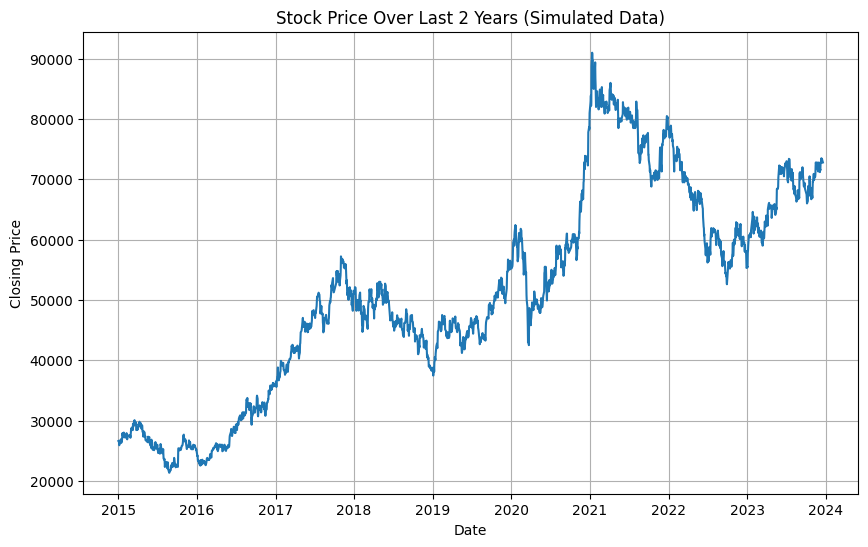

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# # 임시 데이터 생성
# # 실제 데이터 대신 현재 날짜에서 2년 전까지의 날짜와 임의의 종가를 생성
# dates = pd.date_range(start="2021-01-01", end="2022-12-31", freq='B')  # 평일만 포함
# closing_prices = np.random.rand(len(dates)) * 100000  # 삼성전자 종가 범위를 고려한 임의의 값

# # 데이터 프레임 생성
# df = pd.DataFrame({'Date': dates, 'Close': closing_prices})
# df.set_index('Date', inplace=True)

# 차트 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Stock Price Over Last 2 Years (Simulated Data)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

In [ ]:
pip install dart-fss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.0 MB/s eta 0:00:00
  Created wheel for halo: filename=halo-0.0.31-py3-none-any.whl size=11235 sha256=d4c12f2caac456beb7a238066b44b9600c90ed7b991f583a2bf053d732a22a53
  Stored in directory: /root/.cache/pip/wheels/5a/d9/8a/b4f14c44aba7c164d4379eca6f1dde59360050406b1edaec24
Successfully built halo


In [ ]:
import dart_fss as dart

# API 키 설정 (DART 홈페이지에서 발급받은 API 키 필요)
api_key = '4da77117b11db45d43579b2482bae147cc8a5af4'
dart.set_api_key(api_key=api_key)

# 상장된 회사 검색 (예: 삼성전자)
corp_list = dart.get_corp_list()
samsung = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]



In [ ]:
corp_list

Number of companies: 103728

In [ ]:
samsung

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20230110
sector,통신 및 방송 장비 제조업
product,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등"
corp_cls,Y


In [ ]:
# 특정 연도의 사업보고서 가져오기 (예: 2020년)
fs = samsung.extract_fs(bgn_de='20200101')

# 재무제표 출력
print(fs)

In [ ]:
import dart_fss as dart
import matplotlib.pyplot as plt
import pandas as pd

# DART API 키 설정
api_key = '4da77117b11db45d43579b2482bae147cc8a5af4'
dart.set_api_key(api_key=api_key)

# 상장 회사 목록 가져오기
corp_list = dart.get_corp_list()

# 특정 회사 검색 (예: 삼성전자)
company = corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

# 연도별 재무제표 데이터 가져오기
years = ['2018', '2019', '2020', '2021', '2022']
data = {}

for year in years:
    # 각 연도의 사업보고서 가져오기
    report = company.extract_fs(bgn_de=year+'0101')

    # 필요한 재무 데이터 추출 (예: 매출액, 영업이익)
    df = report.show('cis', show_abstract=False, show_class=False, show_depth=2)
    revenue = df[df['account_id'] == 'ifrs-full_Revenue'].iloc[0][year]
    operating_income = df[df['account_id'] == 'dart_OperatingIncomeLoss'].iloc[0][year]

    data[year] = [revenue, operating_income]

# DataFrame으로 변환
df_trend = pd.DataFrame(data, index=['Revenue', 'Operating Income']).T

# 차트로 추세 시각화
df_trend.plot(kind='line')
plt.title('Financial Trend Analysis - Samsung Electronics')
plt.xlabel('Year')
plt.ylabel('Amount (KRW)')
plt.grid(True)
plt.show()

Annual reports:   0%|          | 0/6 [00:00<?, ?report/s]


KeyboardInterrupt



In [ ]:
pip install OpenDartReader

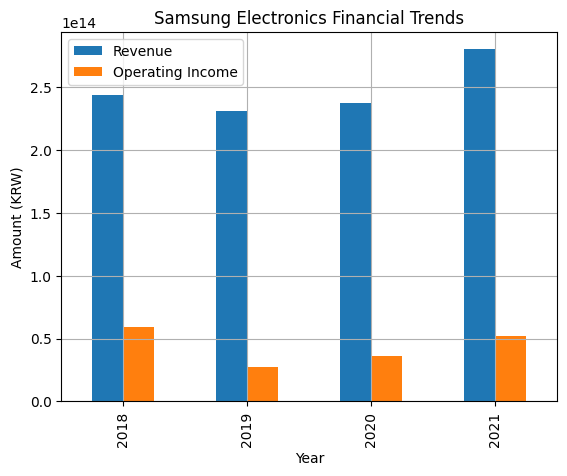

In [ ]:
import OpenDartReader
import matplotlib.pyplot as plt
import pandas as pd

# OpenDartReader 인스턴스 초기화 (API 키 필요)
api_key = '4da77117b11db45d43579b2482bae147cc8a5af4'
dart = OpenDartReader(api_key)

# 특정 회사의 재무제표 데이터 가져오기 (예: 삼성전자, 코드: '005930')
corp_code = '005930'
years = ['2018', '2019', '2020', '2021']

# 데이터 저장을 위한 딕셔너리
data = {'Year': [], 'Revenue': [], 'Operating Income': []}

for year in years:
    # 연간 재무제표 가져오기
    # fs = dart.finstate(corp=corp_code, bsns_year=year, fs_div='CFS')
    fs = dart.finstate(corp=corp_code, bsns_year=year, reprt_code='11011')

    # 매출액과 영업이익 추출
    revenue = fs[fs['sj_nm'].str.contains('손익계산서') & (fs['account_nm'] == '매출액')]['thstrm_amount'].values[0]
    operating_income = fs[fs['sj_nm'].str.contains('손익계산서') & (fs['account_nm'] == '영업이익')]['thstrm_amount'].values[0]

    # 데이터 저장
    data['Year'].append(year)
    data['Revenue'].append(int(revenue.replace(',', '')))
    data['Operating Income'].append(int(operating_income.replace(',', '')))

# DataFrame 생성
df = pd.DataFrame(data)
df.set_index('Year', inplace=True)

# 데이터 시각화
df.plot(kind='bar')
plt.title('Samsung Electronics Financial Trends')
plt.ylabel('Amount (KRW)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [ ]:
fs = dart.finstate(corp=corp_code, bsns_year=year, reprt_code='11011')

In [ ]:
fs


<ipython-input-9-be79ef1ff008>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  revenue = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm'] == '매출액']['thstrm_amount'].values[0]
<ipython-input-9-be79ef1ff008>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  operating_income = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm'] == '영업이익']['thstrm_amount'].values[0]
<ipython-input-9-be79ef1ff008>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  revenue = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm'] == '매출액']['thstrm_amount'].values[0]
<ipython-input-9-be79ef1ff008>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  operating_income = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm'] == '영업이익']['thstrm_amount'].values[0]
<ipython-input-9-be79ef1ff008>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  revenue = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm

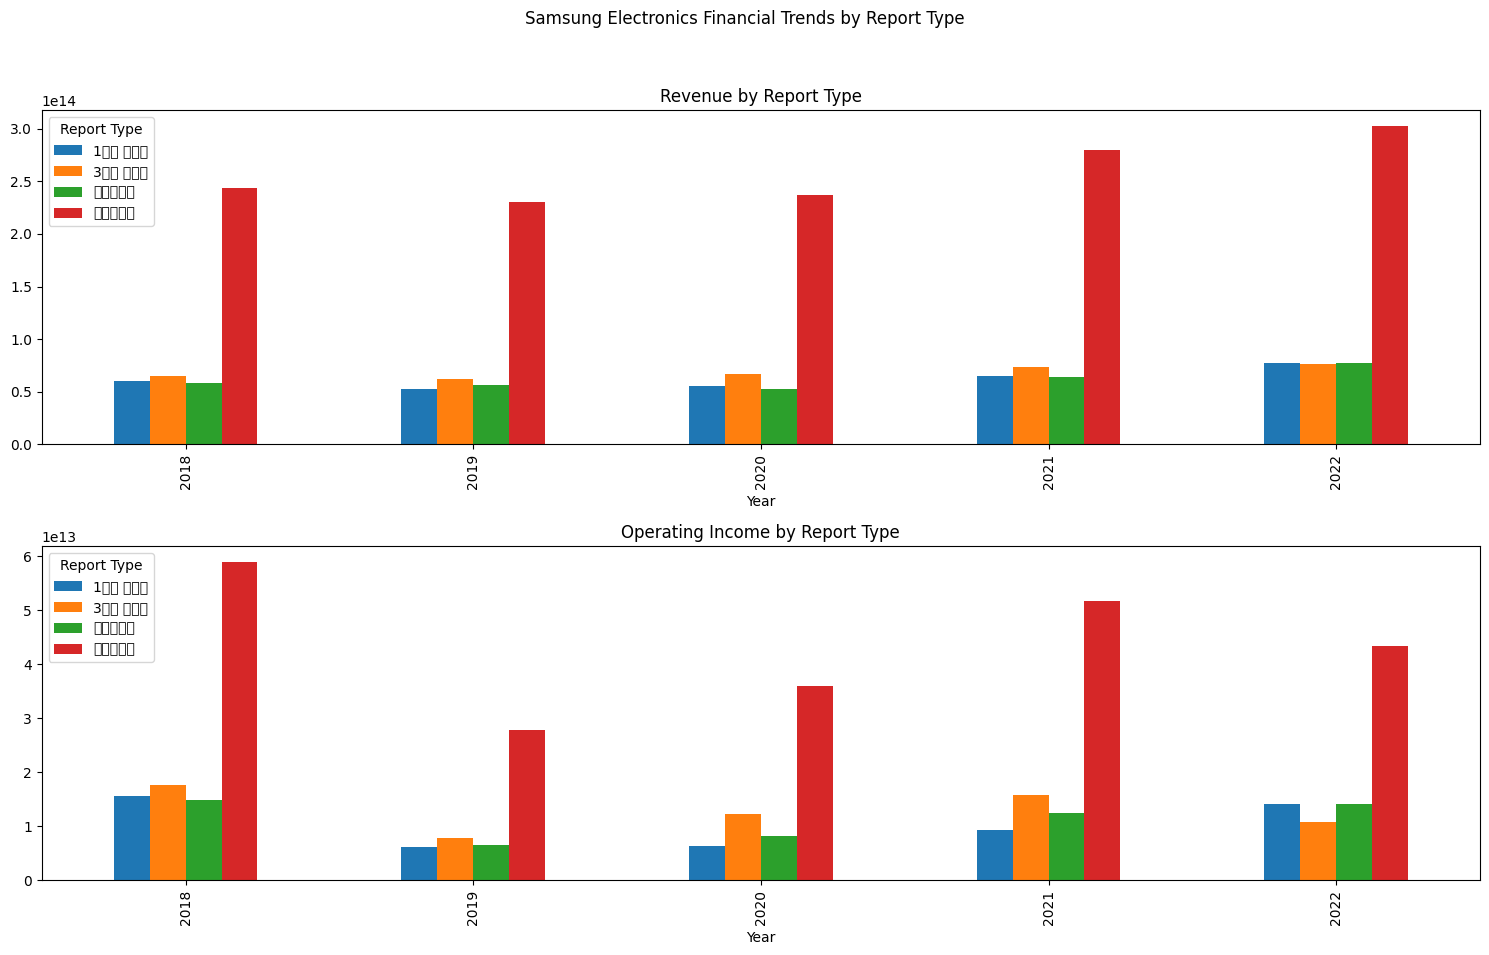

In [ ]:
import OpenDartReader
import matplotlib.pyplot as plt
import pandas as pd

# OpenDartReader 인스턴스 초기화 (API 키 필요)
api_key = '4da77117b11db45d43579b2482bae147cc8a5af4'
dart = OpenDartReader(api_key)

# 특정 회사의 재무제표 데이터 가져오기 (예: 삼성전자, 코드: '005930')
corp_code = '005930'

# 보고서 유형: 사업보고서, 반기보고서, 1분기 보고서, 3분기 보고서
report_types = {
    '11011': '사업보고서',
    '11012': '반기보고서',
    '11013': '1분기 보고서',
    '11014': '3분기 보고서'
}

# 연도별로 데이터 가져오기
years = ['2018', '2019', '2020', '2021', '2022']
data = []

for year in years:
    for code, report_type in report_types.items():
        # 연간 재무제표 가져오기
        fs = dart.finstate(corp=corp_code, bsns_year=year, reprt_code=code)

        # 매출액과 영업이익 추출
        if len(fs) > 0 and '손익계산서' in fs['sj_nm'].values:
            revenue = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm'] == '매출액']['thstrm_amount'].values[0]
            operating_income = fs[fs['sj_nm'] == '손익계산서'][fs['account_nm'] == '영업이익']['thstrm_amount'].values[0]
            data.append([year, report_type, int(revenue.replace(',', '')), int(operating_income.replace(',', ''))])
        else:
            # 데이터가 없는 경우
            data.append([year, report_type, 0, 0])

# DataFrame 생성
df = pd.DataFrame(data, columns=['Year', 'Report Type', 'Revenue', 'Operating Income'])
df.set_index(['Year', 'Report Type'], inplace=True)

# unstack 후 데이터 시각화
unstacked_df = df.unstack(level=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
unstacked_df['Revenue'].plot(kind='bar', ax=axes[0], title='Revenue by Report Type')
unstacked_df['Operating Income'].plot(kind='bar', ax=axes[1], title='Operating Income by Report Type')

plt.suptitle('Samsung Electronics Financial Trends by Report Type')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
pip install opendartreader finance-datareader matplotlib pandas

<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-11-587df66083e1>:36: UserWarning: Glyph 

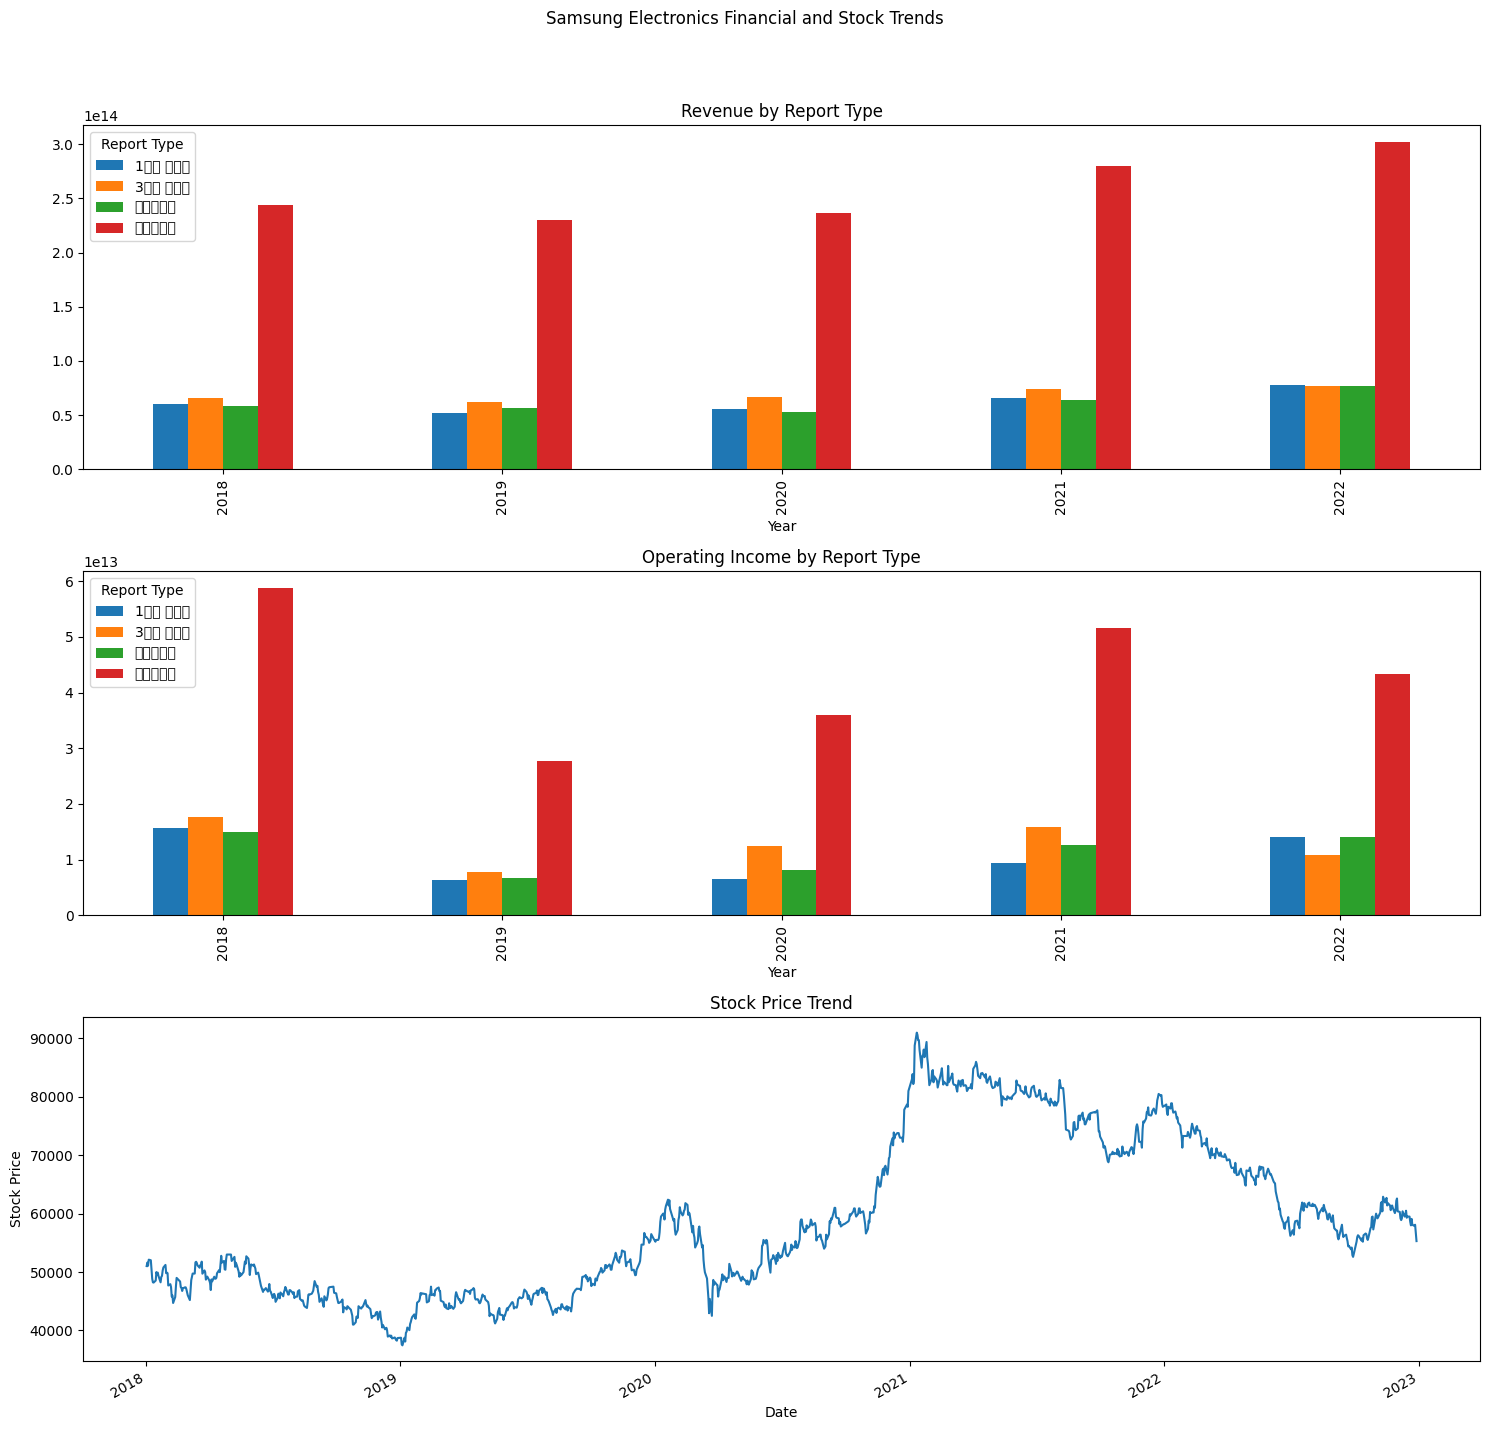

In [ ]:
import OpenDartReader
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd

# OpenDartReader 인스턴스 초기화 (API 키 필요)
api_key = '4da77117b11db45d43579b2482bae147cc8a5af4'
dart = OpenDartReader(api_key)

# 삼성전자 코드와 기간 설정
corp_code = '005930'
years = ['2018', '2019', '2020', '2021', '2022']

# 재무제표 데이터 가져오기
# ... (위에서 제공된 재무제표 데이터 가져오기 코드)

# 주식 가격 데이터 가져오기
stock_data = fdr.DataReader(corp_code, start='2018-01-01', end='2022-12-31')

# 데이터 프레임 생성 및 시각화
df = pd.DataFrame(data, columns=['Year', 'Report Type', 'Revenue', 'Operating Income'])
df.set_index(['Year', 'Report Type'], inplace=True)
unstacked_df = df.unstack(level=1)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))

# 재무제표 데이터 시각화
unstacked_df['Revenue'].plot(kind='bar', ax=axes[0], title='Revenue by Report Type')
unstacked_df['Operating Income'].plot(kind='bar', ax=axes[1], title='Operating Income by Report Type')

# 주식 가격 추세 시각화
stock_data['Close'].plot(ax=axes[2], title='Stock Price Trend')
axes[2].set_ylabel('Stock Price')

plt.suptitle('Samsung Electronics Financial and Stock Trends')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
<ipython-input-12-1b7b899a3a64>:45: UserWarning: Glyph 

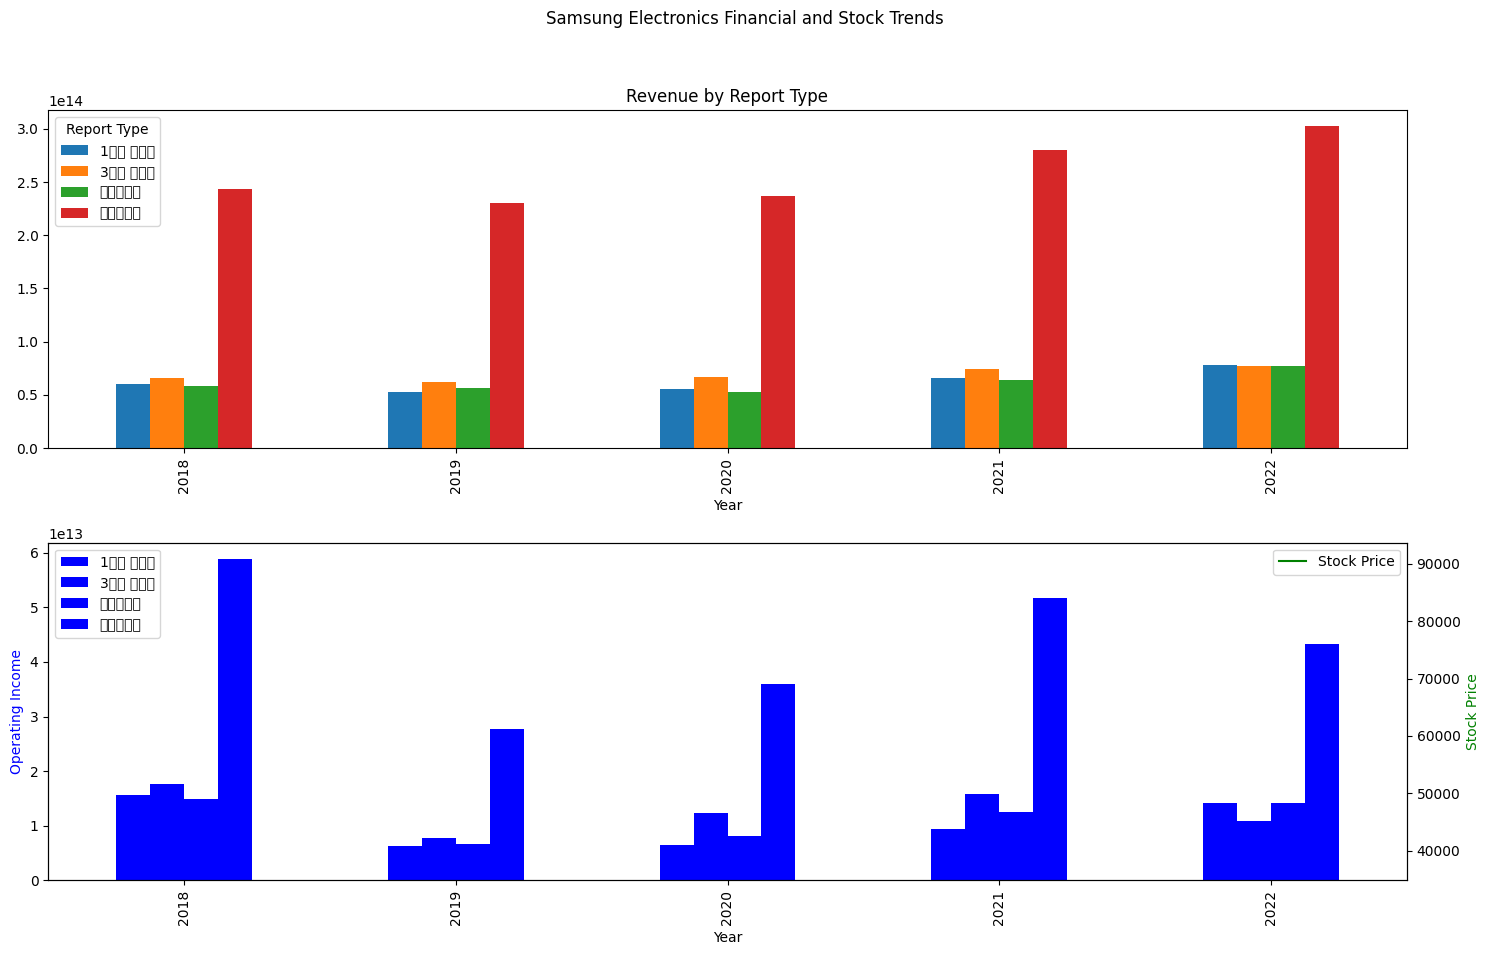

In [ ]:
import OpenDartReader
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd

# OpenDartReader 인스턴스 초기화 (API 키 필요)
api_key = '4da77117b11db45d43579b2482bae147cc8a5af4'
dart = OpenDartReader(api_key)

# 삼성전자 코드와 기간 설정
corp_code = '005930'
years = ['2018', '2019', '2020', '2021', '2022']

# 재무제표 데이터 가져오기
# ... (위에서 제공된 재무제표 데이터 가져오기 코드)

# 주식 가격 데이터 가져오기
stock_data = fdr.DataReader(corp_code, start='2018-01-01', end='2022-12-31')

# 데이터 프레임 생성 및 시각화
df = pd.DataFrame(data, columns=['Year', 'Report Type', 'Revenue', 'Operating Income'])
df.set_index(['Year', 'Report Type'], inplace=True)
unstacked_df = df.unstack(level=1)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# 매출액 시각화
unstacked_df['Revenue'].plot(kind='bar', ax=axes[0], title='Revenue by Report Type')

# 영업이익과 주식 가격 추세 시각화
ax2 = axes[1]
unstacked_df['Operating Income'].plot(kind='bar', ax=ax2, color='blue', label='Operating Income')
ax2.set_ylabel('Operating Income', color='blue')

# 주식 가격 추세를 같은 축에 추가
ax3 = ax2.twinx()
stock_data['Close'].plot(ax=ax3, color='green', label='Stock Price')
ax3.set_ylabel('Stock Price', color='green')

# 범례 표시
ax2.legend(loc='upper left')
ax3.legend(loc='upper right')

plt.suptitle('Samsung Electronics Financial and Stock Trends')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
pip install finterstellar

In [ ]:
import finterstellar as fs

In [ ]:
df = fs.get_ohlc("NAIL", "2016-01-01" , "2018-01-01")

In [ ]:
df

,Open,High,Low,Close,Volume,Adj Close
2016-01-04,28.00,28.00,25.06,25.06,5000,24.45
2016-01-05,25.60,25.60,25.55,25.55,2300,24.93
2016-01-06,25.01,25.01,23.99,23.99,3100,23.40
2016-01-07,22.15,22.15,20.86,20.86,600,20.35
2016-01-08,21.05,21.05,19.81,19.85,3600,19.37
...,...,...,...,...,...,...
2017-12-22,92.08,92.40,90.30,90.70,47400,89.70
2017-12-26,90.98,92.16,90.98,91.89,52200,90.87
2017-12-27,92.71,93.31,91.89,92.28,35800,91.26
2017-12-28,93.00,94.36,92.17,94.28,59900,93.24


In [ ]:
pip show finterstellar

Name: finterstellar
Version: 0.3.1
Summary: Quantitative analysis tools for investment
Home-page: https://github.com/finterstellar/library
Author: finterstellar
Author-email: finterstellar@naver.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, numpy, pandas, requests
Required-by: 


In [ ]:
884856-765168

119688

In [ ]:
999278-765168

234110

In [ ]:
1000*12*6

72000